## Hands-On with YOLO

### Implementation of YOLO Algorithm using Python

### Requirements :

A PC or Mac with a stable internet connection and an IDE installed (ex-Jupyter Notebook, etc) to implement YOLO using Python.

### **Learnings :**

Hands-On experience on object detection will deepen your understanding of YOLO Algorithm and enhance your clarity of the concept.

### **Note :**

The official implementation of this algorithm is available through DarkNet (neural net implementation from the ground up in C from the author). Darknet is an open-source neural network written by Joseph Redmon, written in C and CUDA. It supports both CPU and GPU computation.The official implementation of the darknet is available at: https://pjreddie.com/darknet/ and on Github: https://github.com/pjreddie/darknet for people to use.

## **Let's get started**

### Import Libraries

We must import OpenCV and NumPY Libraries, essentially to progress ahead with the code and to view the results in the end.

In [1]:
# import opencv and numpy libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Command Line Arguments

In the next step, we require the following four arguments: 


*   **Input image :** to read the image (*of our choice*) on which we want to perform object detection.

*   **YOLO config file :** the neural network model architecture is stored in config file.

*   **Pre-trained YOLO weights :** since CNNs like YOLO requires a lot of images to train (*and since images have lots of variations in them*), its best to have transfer learning where a pre-trained model is used, that detects **object boundaries in image.**

*   **Text file containing class names :** this particular model is trained on **COCO dataset** (*common objects in context*) from Microsoft. It is capable of detecting 80 common objects which are there in the list.

**Input image source :** https://rb.gy/eljzyy

**Config file (publicly avaibale to download) :** https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg

Pre-trained weight (*publicly available to download*) : https://pjreddie.com/media/files/yolov3.weights 

Text file : We can create a text file of **80-100 random objects that we see around** or that which **we want to detect from images** and then save it to upload over here.

In [2]:
#Mention the path as per the location in your system
#load the input image after saving in drive and then assign it to a variable called 'image'
input_image = cv2.imread("C:\\Users\\91966\\Desktop\\YOLO\\cat_dog.jpg", cv2.COLOR_BGR2RGB)
RGBimage = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#load the configuration file after downloading and saving it and assign it as given below 
config_file  = "C:\\Users\\91966\\Desktop\\YOLO\\yolov3_config.cfg"

# load the weights that we have downloaded after saving it and assign in a variable 'weights'
weights = "C:\\Users\\91966\\Desktop\\YOLO\\yolov3.weights"

# load the text file which contains class names or we can say names of the objects after saving the file
class_names = "C:\\Users\\91966\\Desktop\\YOLO\\class_names.txt"

Let's look at the matrices of our input image

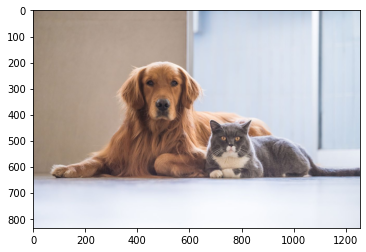

In [3]:
# print the image matrix
plt.imshow(RGBimage)

### Preparing Input

In the below code, we are basically preparing the input by reading its width and height and reading names from the text file that we have created by putting down the list of different class names (names of the objects), in human readable form so that it extracts them to the list. 

In [4]:
# read input image
width = input_image.shape[1]
height = input_image.shape[0]
scale = 0.00392

# read class names from text file
classes = None
with open(class_names, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

Here we generate different colors for the different classes to draw bounding boxes.Then we read the weights and config file and creates the network. The below codes prepares the input image to run through the deep neural network.

In [5]:
# generate different colors for different classes 
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet(weights, config_file)

# create input blob 
blob = cv2.dnn.blobFromImage(input_image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)

### Output Layer and Bounding Box

In the next step, we are preparing output layer and bounding box for the input image. 
Generally in a sequential CNN network there is only one output layer in the end. 
However, in this architecture, we are using multiple output layers for predictions.

In [6]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    
    
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

# this function draws rectangle over the given predicted region
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

# to label the class name over the rectangular box.
    label = str(classes[class_id])

# to assign colors
    color = colors[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

### Run Inference

We are now going to run inference. This is where the exact feed forward through the network happens. If we don’t specify the output layer names, by default, it is going to return the predictions, only from final output layer. Any other intermediate output layer is ignored.

We go through each of the detections from each of the output layers, to get the class id, confidence and bounding box corners and most importantly, to ignore the weak detections (*i.e., detections with low confidence value*).

In [7]:
# run inference through the network
# and gather predictions from output layers
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

### Non-Max Suppression

Finally, we are going to apply non-max supressions, and even though we ignored weak detections, there will be lot of duplicate detections with the overlapping bounding boxes. 

Non-max suppression removes the boxes which are highly overlapping.

In [8]:
# apply non-max suppression


indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    i = i - 1
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(input_image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))


### Display Output

And finally we look at the detections that are left and draw bounding boxes around them and thus the output image is displayed.

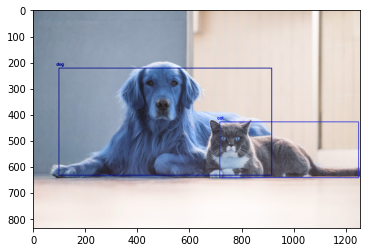

In [9]:
# display output image    
plt.imshow(input_image)

# wait until any key is pressed

    
 # save output image to disk
cv2.imwrite("object-detection.jpg", input_image)

# release resources
cv2.destroyAllWindows()

# **Industrial Application I**

## **Pedestrian Detection in Survillance and Safety Systems**

Detecting pedestrians could be significant application across numerous industries. Normal use cases involes security applications that track who's travelling every which way as safety systems are intended to keep individuals out of damage's way.

###### Input Image source: https://media-cldnry.s-nbcnews.com/image/upload/newscms/2018_37/1366982/pedestrians-walk-street-stock-today-main-180911.jpg

In [10]:
input_image1 = cv2.imread("C:\\Users\\91966\\Desktop\\YOLO\\pedestrian.jpg", cv2.COLOR_BGR2RGB)
RGBimage1 = cv2.cvtColor(input_image1, cv2.COLOR_BGR2RGB)
config_file  = "C:\\Users\\91966\\Desktop\\YOLO\\yolov3_config.cfg"
weights = "C:\\Users\\91966\\Desktop\\YOLO\\yolov3.weights"
class_names = "C:\\Users\\91966\\Desktop\\YOLO\\class_names.txt"

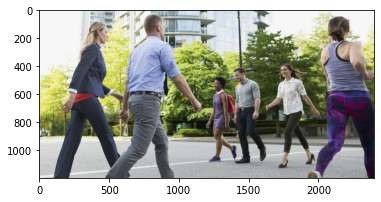

In [11]:
plt.imshow(RGBimage1)

In [12]:
print(input_image1)

[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 246 242]
  [247 246 242]
  [247 247 241]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 246 242]
  [247 246 242]
  [246 245 241]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 245 244]
  [247 246 242]
  [246 245 241]]

 ...

 [[240 240 240]
  [239 239 239]
  [238 238 238]
  ...
  [ 20  11  14]
  [ 19   9  15]
  [ 18   8  14]]

 [[238 238 238]
  [237 237 237]
  [237 237 237]
  ...
  [ 20  11  14]
  [ 22  12  18]
  [ 18   8  14]]

 [[232 232 232]
  [232 232 232]
  [234 232 232]
  ...
  [ 15   6   9]
  [ 19   9  15]
  [ 21  12  15]]]


In [13]:
width = input_image1.shape[1]
height = input_image1.shape[0]
scale = 0.00392

In [14]:
classes = None
with open(class_names, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [15]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))
net = cv2.dnn.readNet(weights, config_file)
blob = cv2.dnn.blobFromImage(input_image1, scale, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)

In [16]:

def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    
    
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):


    label = str(classes[class_id])


    color = colors[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [17]:
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [18]:

indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)


for i in indices:
    i = i - 1
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(input_image1, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

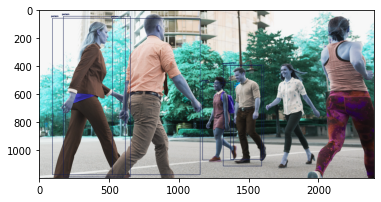

In [19]:
   
plt.imshow(input_image1)


cv2.imwrite("object-detection.jpg", input_image1)


cv2.destroyAllWindows()

# **Industrial Application II**



## **Vehicle Detection in Autonomous Driving**

#### Vehicle Detection is one of the widely used applications of YOLO. It is capable of detecting different vehicals like car, train, bus, bicycle, airplane, bike, etc. When any of the vehicles is detected, a bounding box is created around it along with its name.

###### Input Image source: https://cdni.autocarindia.com/Utils/ImageResizer.ashx?n=http%3A%2F%2Fcdni.autocarindia.com%2FFeatures%2FDSC_1643.jpg&c=0

In [20]:
input_image2 = cv2.imread("C:\\Users\\91966\\Desktop\\YOLO\\cars.jpg", cv2.COLOR_BGR2RGB)
RGBimage2 = cv2.cvtColor(input_image2, cv2.COLOR_BGR2RGB)
config_file  = "C:\\Users\\91966\\Desktop\\YOLO\\yolov3_config.cfg"
weights = "C:\\Users\\91966\\Desktop\\YOLO\\yolov3.weights"
class_names = "C:\\Users\\91966\\Desktop\\YOLO\\class_names.txt"

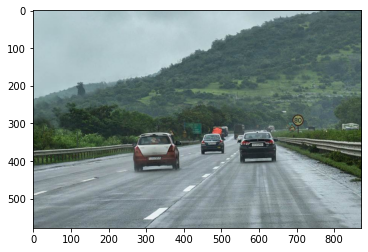

In [21]:
plt.imshow(RGBimage2)

In [22]:
print(input_image2)

[[[211 204 184]
  [211 204 184]
  [211 204 184]
  ...
  [ 97  94  73]
  [ 96  93  72]
  [ 98  95  74]]

 [[211 204 184]
  [211 204 184]
  [211 204 184]
  ...
  [ 94  91  70]
  [ 94  91  70]
  [ 95  92  71]]

 [[211 204 184]
  [211 204 184]
  [211 204 184]
  ...
  [101 100  79]
  [101 100  79]
  [101 100  79]]

 ...

 [[112 111 101]
  [110 109  99]
  [107 106  96]
  ...
  [187 180 163]
  [189 182 167]
  [182 175 158]]

 [[113 111 101]
  [114 112 102]
  [115 113 103]
  ...
  [179 175 156]
  [177 173 155]
  [176 172 153]]

 [[114 112 102]
  [114 112 102]
  [115 113 103]
  ...
  [180 176 157]
  [179 175 156]
  [178 174 155]]]


In [23]:
width = input_image2.shape[1]
height = input_image2.shape[0]
scale = 0.00392

In [24]:
classes = None
with open(class_names, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [25]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))
net = cv2.dnn.readNet(weights, config_file)
blob = cv2.dnn.blobFromImage(input_image2, scale, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)

In [26]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    
    
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):


    label = str(classes[class_id])


    color = colors[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [27]:
outs = net.forward(get_output_layers(net))


class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [28]:


indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i - 1
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(input_image2, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

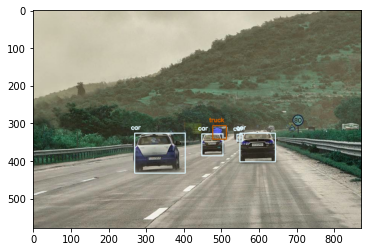

In [29]:
plt.imshow(input_image2)


cv2.imwrite("object-detection.jpg", input_image2)


cv2.destroyAllWindows()

# **Industrial Application III**

## **Animal Detection in Forests**

#### Animal Detection using YOLO detect large animals before they enter the road and then warn drivers that a large animal is on or near the road at that time. It is capable of detecting many different animals.

###### Input Image source: https://www.thulathula.com/wp-content/uploads/2018/02/ELEPHANT-AND-RHINO-25-e1518794711916-1.jpg

In [30]:
input_image3 = cv2.imread("C:\\Users\\91966\\Desktop\\YOLO\\century.jpg", cv2.COLOR_BGR2RGB)
RGBimage3 = cv2.cvtColor(input_image3, cv2.COLOR_BGR2RGB)
config_file  = "C:\\Users\\91966\\Desktop\\YOLO\\yolov3_config.cfg"
weights = "C:\\Users\\91966\\Desktop\\YOLO\\yolov3.weights"
class_names = "C:\\Users\\91966\\Desktop\\YOLO\\class_names.txt"

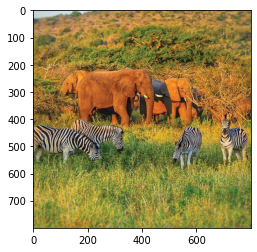

In [31]:
plt.imshow(RGBimage3)

In [32]:
print(input_image3)

[[[208 203 200]
  [207 202 199]
  [207 202 199]
  ...
  [ 74 129 172]
  [ 78 133 176]
  [ 83 138 181]]

 [[209 204 201]
  [208 203 200]
  [208 203 200]
  ...
  [ 71 126 169]
  [ 75 130 173]
  [ 79 134 177]]

 [[209 205 200]
  [209 205 200]
  [208 204 199]
  ...
  [ 73 128 171]
  [ 77 132 177]
  [ 80 135 180]]

 ...

 [[ 40 142 147]
  [ 42 143 151]
  [ 40 142 154]
  ...
  [ 54 118  82]
  [ 55 116  78]
  [ 55 114  76]]

 [[ 53 139 145]
  [ 55 140 148]
  [ 56 141 151]
  ...
  [ 60 122  82]
  [ 57 115  74]
  [ 54 110  69]]

 [[138 114  94]
  [141 117  99]
  [140 118 100]
  ...
  [140 108  79]
  [128  92  62]
  [117  79  49]]]


In [33]:
width = input_image3.shape[1]
height = input_image3.shape[0]
scale = 0.00392

In [34]:
classes = None
with open(class_names, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [35]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))
net = cv2.dnn.readNet(weights, config_file)
blob = cv2.dnn.blobFromImage(input_image3, scale, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)

In [36]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers


def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):


    label = str(classes[class_id])
    color = colors[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [37]:
outs = net.forward(get_output_layers(net))


class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [38]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i - 1
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(input_image3, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

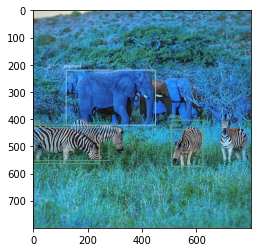

In [39]:
   
plt.imshow(input_image3)


cv2.imwrite("object-detection.jpg", input_image3)


cv2.destroyAllWindows()

In [40]:
import cv2
import numpy as np  

In [41]:

net = cv2.dnn.readNet(
    "C:\\Users\\91966\\Desktop\\YOLO\\yolov3rt.weights",
    "C:\\Users\\91966\\Desktop\\YOLO\\yolov3rt_testing.cfg",
)

classes = []
with open("C:\\Users\\91966\\Desktop\\YOLO\\classes.txt", "r") as f:
    classes = f.read().splitlines()

In [42]:

cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(100, 3))


while True:
    _, img = cap.read()
    height, width, _ = img.shape

    blob = cv2.dnn.blobFromImage(
        img, 1 / 255, (416, 416), (0, 0, 0), swapRB=True, crop=False
    )
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)

    boxes = []
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)

    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(
                img,
                ""
                + label
                + " ",
                (x, y + 20),
                font,
                2,
                (255, 255, 255),
                2,
            )

    cv2.imshow("Image", img)
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

: 